In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold

In [3]:
import os
os.chdir(r'd:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\recontrucao_da_estatistica_pesqueira_brasileira')
print(os.getcwd())

d:\reconstrucao_estatistica_pesqueira\reconstrucao_estatistica_brasileira\recontrucao_da_estatistica_pesqueira_brasileira


In [4]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_22724\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [5]:
df.head()

,Ano,Lula_art,Lula_ind,Lula_art_ind,Lula_oceanica_art,Calamar_ind,Polvo_art,Polvo_ind,Polvo_art_ind,Polvo_cabecinha_art,...,Mexilhao_ind,Mexilhao_mangue_art,Caramujo_art,Caramujo_ind,Vieira_ind,Berbigao_art,Vongole_art,Outros_moluscos,TOTAL_MOLLUSCS,TOTAL_GROUPS_F&M
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28137.0
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27432.0
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26648.0
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24552.0
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22755.0


In [6]:
x0 = df[['Ano', 'TOTAL_MOLLUSCS']].dropna().values

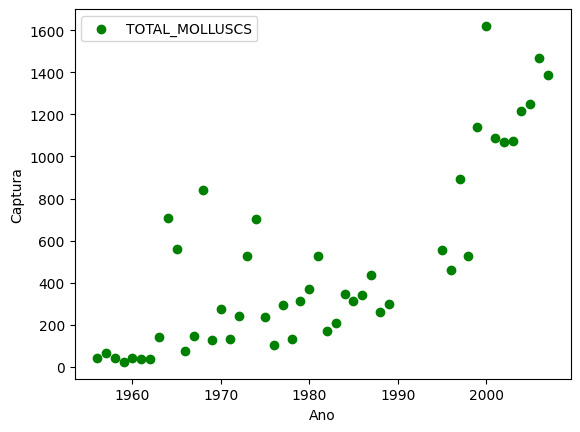

In [7]:
plt.scatter(x0[:, 0], x0[:, 1], c='g', label='TOTAL_MOLLUSCS')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.legend()
plt.show()

In [8]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'TOTAL_MOLLUSCS'])

In [9]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['TOTAL_MOLLUSCS'], dtype= np.float32).reshape(-1, 1)
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [10]:
class PrintEveryNEpochs(tf.keras.callbacks.Callback):
    def __init__(self, N):
        super(PrintEveryNEpochs, self).__init__()
        self.N = N

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.N == 0:
            print(f"Epoch {epoch + 1}: loss = {logs['loss']}")

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 50: loss = 0.18311378359794617
Epoch 100: loss = 0.17929495871067047
Epoch 150: loss = 0.1719929277896881
Epoch 200: loss = 0.15790338814258575
Epoch 250: loss = 0.15451523661613464
Epoch 300: loss = 0.14655201137065887
Epoch 350: loss = 0.1496897041797638
Epoch 400: loss = 0.1424630880355835
Epoch 450: loss = 0.14232784509658813
Epoch 500: loss = 0.13799865543842316
Epoch 550: loss = 0.14612436294555664
Epoch 600: loss = 0.13045072555541992
Epoch 650: loss = 0.12836520373821259
Epoch 700: loss = 0.12339706718921661
Epoch 750: loss = 0.11545733362436295
Epoch 800: loss = 0.11629281938076019
Epoch 850: loss = 0.11565051227807999
Epoch 900: loss = 0.11118495464324951
Epoch 950: loss = 0.11174134910106659
Epoch 1000: loss = 0.1124233603477478
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


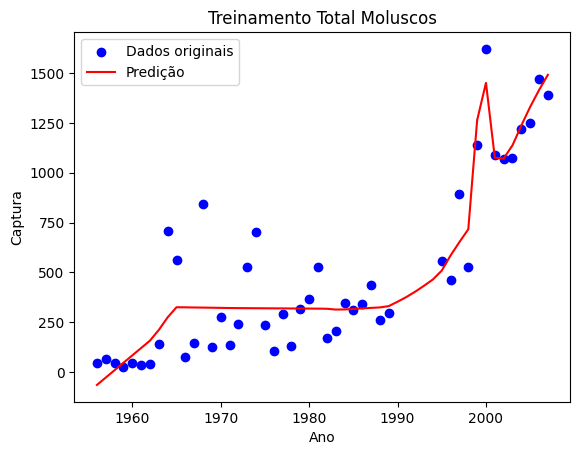

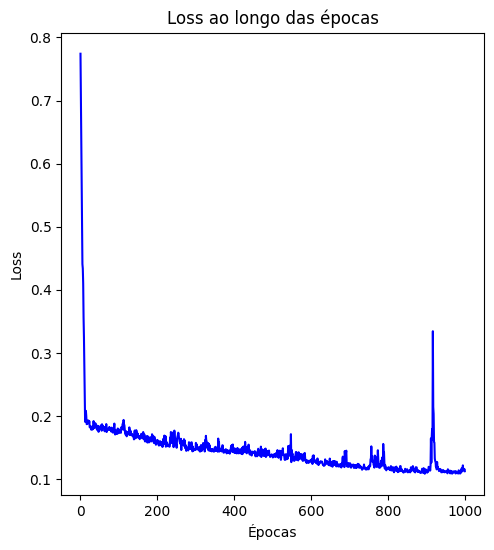

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=50) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=200, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
model.save_weights('pesos/.weights.h5', overwrite=True)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Total Moluscos')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predição para o ano 1950: 0.0
Predição para o ano 1951: 0.0
Predição para o ano 1952: 0.0
Predição para o ano 1953: 0.0
Predição para o ano 1954: 0.0
Predição para o ano 1955: 0.0
Predição para o ano 1990: 352.6300964355469
Predição para o ano 1991: 376.192626953125
Predição para o ano 1992: 403.1024475097656
Predição para o ano 1993: 432.88568115234375
Predição para o ano 1994: 464.43316650390625
Predição para o ano 2008: 1568.46826171875
Predição para o ano 2009: 1645.664794921875
Predição para o ano 2010: 1721.800048828125
Predição para o ano 2011: 1797.22412109375
Predição para o ano 2012: 1870.81298828125
Predição para o ano 2013: 1943.886962890625
Predição para o ano 2014: 2016.9609375
Predição para o ano 2015: 2090.035400390625
Predição para o ano 2016: 2161.71142578125
Predição para o ano 2017: 2233.072021484375
Predição para o ano 2018: 2304.5693359375
Predição para o ano 2019: 2376.28369140625
Predição para o ano 2020: 2447.696044921875
P

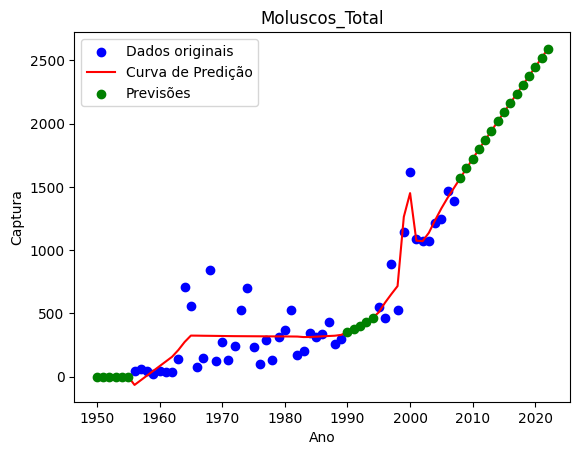

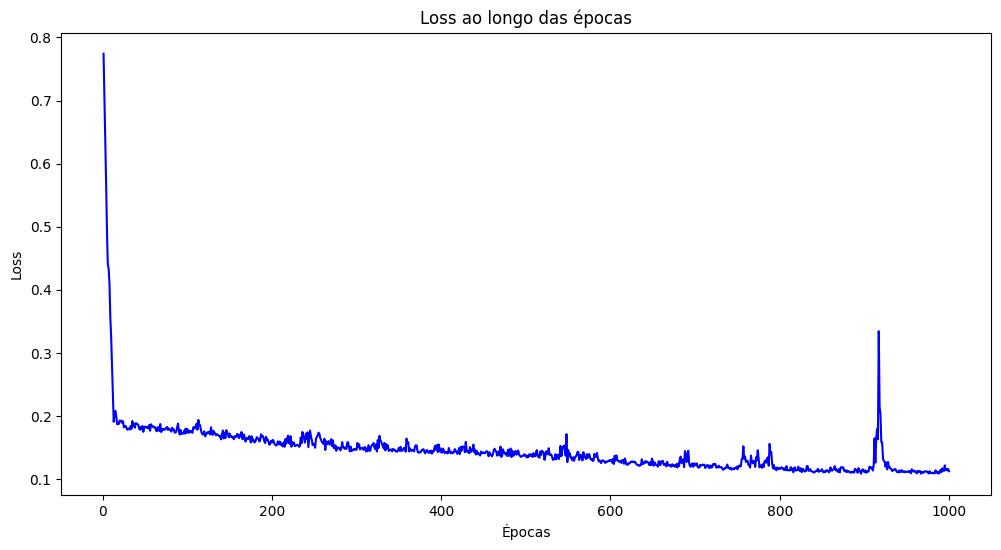

In [12]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1990, 1991, 1992, 1993, 1994, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean
predicoes = np.maximum(predicoes, 0)
for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Moluscos_Total')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [13]:
import pandas as pd
import numpy as np

df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Total_Moluscos_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN          0.000000
1   1951.0               NaN          0.000000
2   1952.0               NaN          0.000000
3   1953.0               NaN          0.000000
4   1954.0               NaN          0.000000
..     ...               ...               ...
68  2018.0               NaN       2304.569336
69  2019.0               NaN       2376.283691
70  2020.0               NaN       2447.696045
71  2021.0               NaN       2518.882324
72  2022.0               NaN       2589.956055

[73 rows x 3 columns]


In [14]:
df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Renan\AppData\Local\Temp\ipykernel_22724\203502866.py:1: SyntaxWarning: invalid escape sequence '\T'
  df_0 = pd.read_excel('DataFrame_reconstruido\Total_Moluscos_reconstruido.xlsx')


In [15]:
x0 = pd.DataFrame(df_0[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x1 = pd.DataFrame(df_0[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [16]:
resultado = x0['Captura Original'] + x1['Captura Preditos']

novo_df0 = pd.DataFrame({'Ano': df_0['Ano'], 'TOTAL_MOLLUSCS': resultado})

print(novo_df0)

     Ano  TOTAL_MOLLUSCS
0   1950        0.000000
1   1951        0.000000
2   1952        0.000000
3   1953        0.000000
4   1954        0.000000
..   ...             ...
68  2018     2304.569336
69  2019     2376.283691
70  2020     2447.696045
71  2021     2518.882324
72  2022     2589.956055

[73 rows x 2 columns]


Lula Artesanal (CURVA DE PROPORÇÕES))

In [17]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_22724\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [18]:
x0 = df[['Ano', 'Lula_art']].dropna().values
x1 = df[['Ano', 'Lula_ind']].dropna().values
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Lula_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Lula_ind'])

In [19]:
df_combinado = pd.merge(df_x0, novo_df0, on='Ano', how='inner')

In [20]:
print(df_combinado)

       Ano   Lula_art  TOTAL_MOLLUSCS
0   1978.0  106.00000      131.000000
1   1979.0  175.00000      314.000000
2   1980.0  335.00000      368.000000
3   1981.0  373.00000      527.000000
4   1982.0  127.00000      171.000000
5   1983.0  140.00000      206.000000
6   1984.0  209.00000      344.000000
7   1985.0  176.00000      313.000000
8   1986.0  114.00000      339.000000
9   1987.0  198.00000      436.000000
10  1988.0  112.00000      260.000000
11  1989.0  146.00000      297.000000
12  1995.0  389.50000      554.500000
13  1996.0   36.50000      460.000000
14  1997.0  104.00000      891.000000
15  1998.0   12.50000      529.000000
16  1999.0  127.50000     1140.500000
17  2000.0   14.00000     1621.000000
18  2001.0  184.50000     1086.500000
19  2002.0   88.50000     1071.000000
20  2003.0   86.50000     1072.500000
21  2004.0  101.00000     1218.000000
22  2005.0  106.50000     1249.000000
23  2006.0  122.50000     1469.500000
24  2007.0   72.50000     1387.500000
25  2008.0  

In [21]:
df_combinado['Proporção'] = df_combinado['Lula_art'] / df_combinado['TOTAL_MOLLUSCS']


curva_de_proporcao = df_combinado[['Ano', 'Proporção']]


print(curva_de_proporcao)

       Ano  Proporção
0   1978.0   0.809160
1   1979.0   0.557325
2   1980.0   0.910326
3   1981.0   0.707780
4   1982.0   0.742690
5   1983.0   0.679612
6   1984.0   0.607558
7   1985.0   0.562300
8   1986.0   0.336283
9   1987.0   0.454128
10  1988.0   0.430769
11  1989.0   0.491582
12  1995.0   0.702435
13  1996.0   0.079348
14  1997.0   0.116723
15  1998.0   0.023629
16  1999.0   0.111793
17  2000.0   0.008637
18  2001.0   0.169811
19  2002.0   0.082633
20  2003.0   0.080653
21  2004.0   0.082923
22  2005.0   0.085268
23  2006.0   0.083362
24  2007.0   0.052252
25  2008.0   0.011196
26  2009.0   0.020983
27  2010.0   0.006203
28  2011.0   0.011458
29  2012.0   0.004746
30  2013.0   0.004937
31  2014.0   0.104037
32  2015.0   0.001204
33  2017.0   0.025507
34  2018.0   0.014711
35  2019.0   0.017659
36  2020.0   0.012020
37  2021.0   0.022558
38  2022.0   0.024492


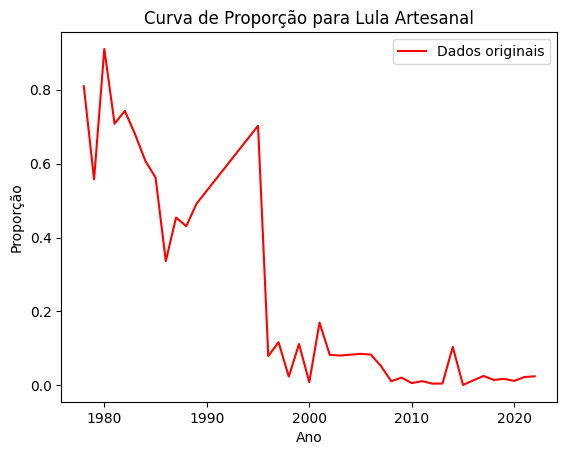

In [22]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Lula Artesanal')
plt.legend()
plt.show()

In [23]:
curva_de_proporcao.to_excel('curvas_de_propocao/Lula_art_prop.xlsx', index=False)

Lula Industrial (CURVA DE PROPORÇÕES)

In [24]:
df_combinado = pd.merge(df_x1, novo_df0, on='Ano', how='inner') 
print(df_combinado)



       Ano   Lula_ind  TOTAL_MOLLUSCS
0   1978.0   20.00000      131.000000
1   1979.0  129.00000      314.000000
2   1980.0   18.00000      368.000000
3   1981.0  115.00000      527.000000
4   1982.0   20.00000      171.000000
5   1983.0   12.00000      206.000000
6   1984.0   87.00000      344.000000
7   1985.0   23.00000      313.000000
8   1986.0   57.00000      339.000000
9   1987.0   30.00000      436.000000
10  1988.0    6.00000      260.000000
11  1989.0   21.00000      297.000000
12  1996.0  286.00000      460.000000
13  1997.0  488.50000      891.000000
14  1998.0  252.50000      529.000000
15  1999.0  345.50000     1140.500000
16  2000.0  637.50000     1621.000000
17  2001.0  214.00000     1086.500000
18  2002.0  387.50000     1071.000000
19  2003.0  389.50000     1072.500000
20  2004.0  444.00000     1218.000000
21  2005.0  451.50000     1249.000000
22  2006.0  507.50000     1469.500000
23  2007.0  572.50000     1387.500000
24  2008.0    2.16700     1568.468262
25  2009.0  

In [25]:
df_combinado['Proporção'] = df_combinado['Lula_ind'] / df_combinado['TOTAL_MOLLUSCS']

curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [26]:
curva_de_proporcao.to_excel('curvas_de_propocao/Lula_ind_prop.xlsx', index=False)

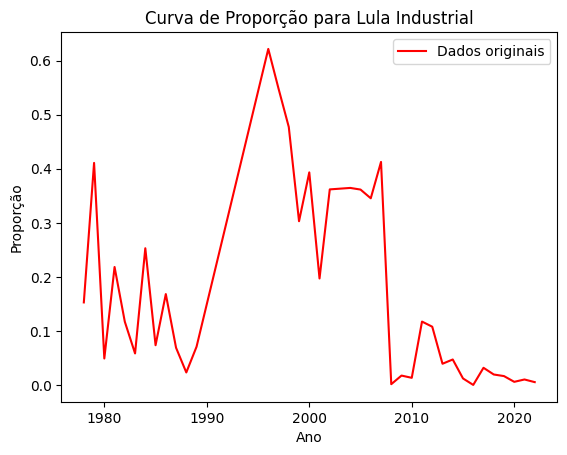

In [27]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Lula Industrial')
plt.legend()
plt.show()

Polvo artesanal (CURVA DE PROPORÇÕES)

In [28]:
df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Renan\AppData\Local\Temp\ipykernel_22724\2014238134.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_excel('Dados\RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')


In [29]:
x0 = df[['Ano', 'Polvo_art']].dropna().values
x1 = df[['Ano', 'Polvo_ind']].dropna().values
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Polvo_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Polvo_ind'])

In [30]:
df_combinado = pd.merge(df_x0, novo_df0, on='Ano', how='inner')
print(df_combinado)

       Ano  Polvo_art  TOTAL_MOLLUSCS
0   1978.0    2.00000      131.000000
1   1979.0    8.00000      314.000000
2   1980.0   13.00000      368.000000
3   1981.0   14.00000      527.000000
4   1982.0    3.00000      171.000000
5   1983.0    1.00000      206.000000
6   1984.0    2.00000      344.000000
7   1985.0   12.00000      313.000000
8   1986.0    9.00000      339.000000
9   1987.0    8.00000      436.000000
10  1988.0    2.00000      260.000000
11  1989.0    6.00000      297.000000
12  1995.0  165.00000      554.500000
13  1996.0    2.00000      460.000000
14  1997.0   33.50000      891.000000
15  1998.0    5.50000      529.000000
16  1999.0   57.50000     1140.500000
17  2000.0   17.00000     1621.000000
18  2001.0   45.50000     1086.500000
19  2002.0   32.00000     1071.000000
20  2003.0   31.00000     1072.500000
21  2004.0   35.50000     1218.000000
22  2005.0   39.50000     1249.000000
23  2006.0   45.00000     1469.500000
24  2007.0   20.50000     1387.500000
25  2008.0  

In [31]:
df_combinado['Proporção'] = df_combinado['Polvo_art'] / df_combinado['TOTAL_MOLLUSCS']

curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [32]:
curva_de_proporcao.to_excel('curvas_de_propocao/Polvo_art_prop.xlsx', index=False)

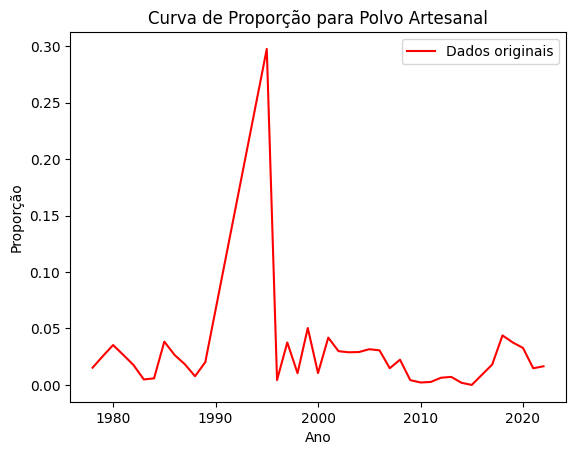

In [34]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Polvo Artesanal')
plt.legend()
plt.show()

In [35]:
df_combinado = pd.merge(df_x1, novo_df0, on='Ano', how='inner')


df_combinado['Proporção'] = df_combinado['Polvo_ind'] / df_combinado['TOTAL_MOLLUSCS']


curva_de_proporcao = df_combinado[['Ano', 'Proporção']]

In [36]:
curva_de_proporcao.to_excel('curvas_de_propocao/Polvo_ind_prop.xlsx', index=False)

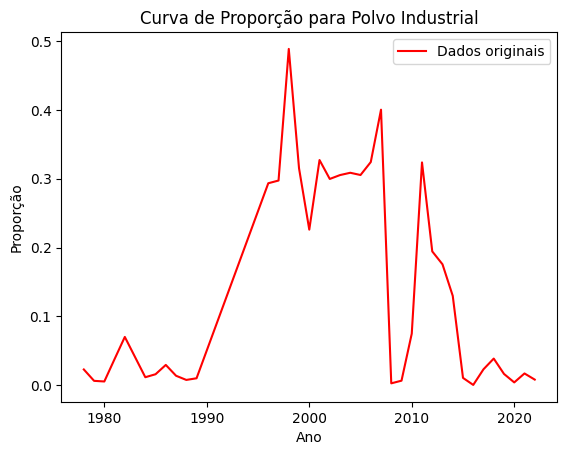

In [37]:
plt.plot(curva_de_proporcao['Ano'], curva_de_proporcao['Proporção'], color='r', label='Dados originais')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Curva de Proporção para Polvo Industrial')
plt.legend()
plt.show()

TREINAMENTO PARA AS CURVAS DE PROPORÇÕES

In [38]:
df = pd.read_excel('curvas_de_propocao/Lula_art_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.809160
1,1979,0.557325
2,1980,0.910326
3,1981,0.707780
4,1982,0.742690


In [39]:
df_x0= pd.DataFrame(df, columns= ['Ano', 'Proporção'])

df_x0= df_x0.drop_duplicates(subset= 'Proporção')


In [40]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Proporção'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [41]:
def leaky_relu(x):
    return tf.nn.RMSprop(x, alpha=0.01)

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.07608577609062195
Epoch 200: loss = 0.05581691861152649
Epoch 300: loss = 0.03646554425358772
Epoch 400: loss = 0.030199339613318443
Epoch 500: loss = 0.031672485172748566
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


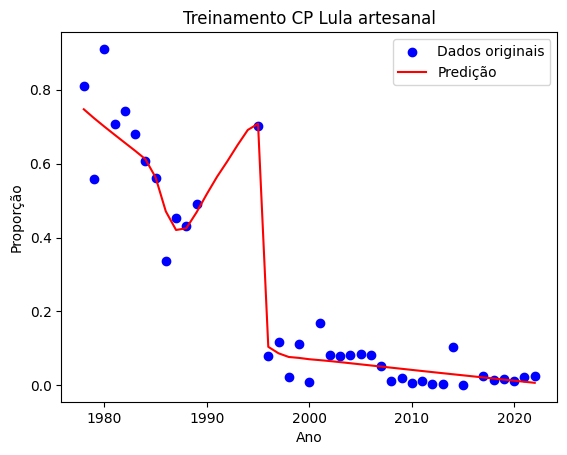

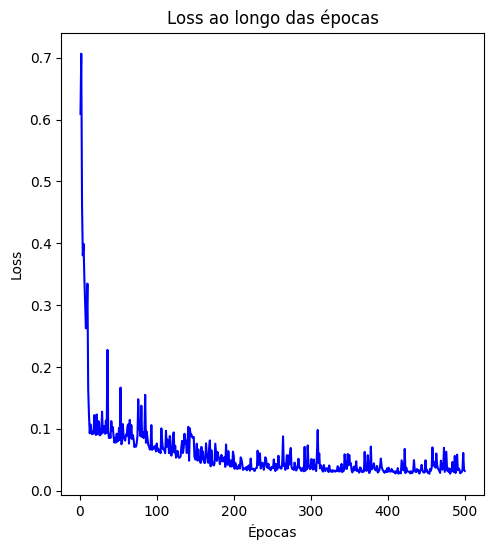

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=500, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Treinamento CP Lula artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predição para o ano 1950: 1.3966213464736938
Predição para o ano 1951: 1.3735166788101196
Predição para o ano 1952: 1.350412130355835
Predição para o ano 1953: 1.3273073434829712
Predição para o ano 1954: 1.3042027950286865
Predição para o ano 1955: 1.2810981273651123
Predição para o ano 1956: 1.2579935789108276
Predição para o ano 1957: 1.2348886728286743
Predição para o ano 1958: 1.2118144035339355
Predição para o ano 1959: 1.188746690750122
Predição para o ano 1960: 1.1656792163848877
Predição para o ano 1961: 1.1426113843917847
Predição para o ano 1962: 1.1195406913757324
Predição para o ano 1963: 1.0964573621749878
Predição para o ano 1964: 1.0733739137649536
Predição para o ano 1965: 1.0502824783325195
Predição para o ano 1966: 1.0270755290985107
Predição para o ano 1967: 1.0038633346557617
Predição para o ano 1968: 0.9805612564086914
Predição para o ano 1969: 0.9572590589523315
Predição para o ano 1970: 0.9340496063232422
Predição para o ano

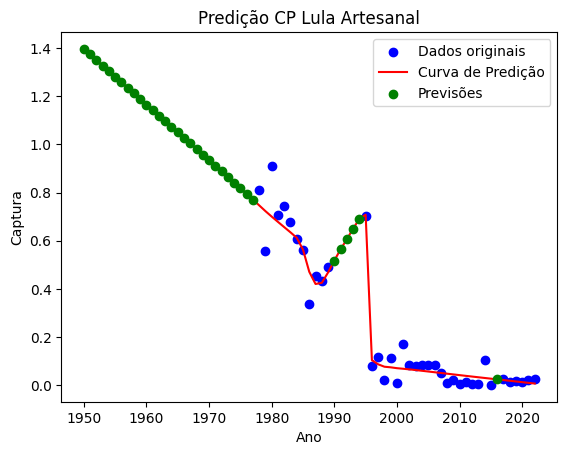

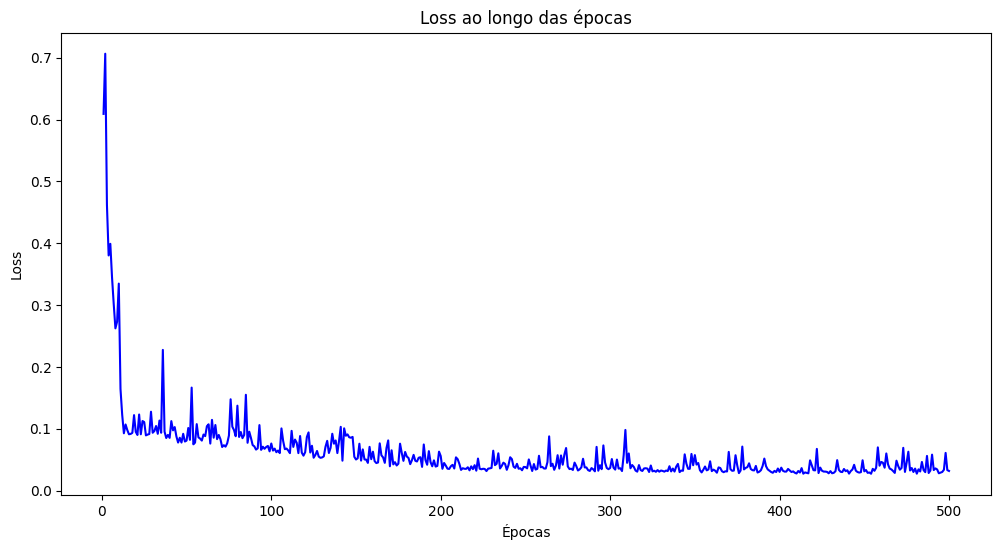

In [43]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)

anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std

predicoes_normalizadas = model.predict(anos_para_prever_normalizados)

predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição CP Lula Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [44]:

df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Lula_artesanal_reconstruido2.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN          1.396621
1   1951.0               NaN          1.373517
2   1952.0               NaN          1.350412
3   1953.0               NaN          1.327307
4   1954.0               NaN          1.304203
..     ...               ...               ...
68  2018.0          0.014711               NaN
69  2019.0          0.017659               NaN
70  2020.0          0.012020               NaN
71  2021.0          0.022558               NaN
72  2022.0          0.024492               NaN

[73 rows x 3 columns]


Lula Industrial

In [45]:
df = pd.read_excel('curvas_de_propocao/Lula_ind_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.152672
1,1979,0.410828
2,1980,0.048913
3,1981,0.218216
4,1982,0.116959


In [47]:
df_x1= pd.DataFrame(df, columns= ['Ano', 'Proporção'])

df_x1= df_x1.drop_duplicates(subset= 'Proporção')


In [48]:
x = np.array(df_x1['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x1['Proporção'], dtype=np.float32).reshape(-1, 1)

In [49]:
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.14171461760997772
Epoch 200: loss = 0.13101927936077118
Epoch 300: loss = 0.11315759271383286
Epoch 400: loss = 0.13575339317321777
Epoch 500: loss = 0.07102872431278229
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021AAB3CF2E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


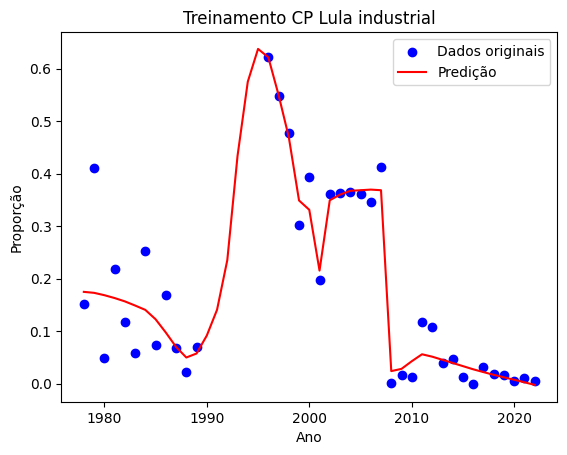

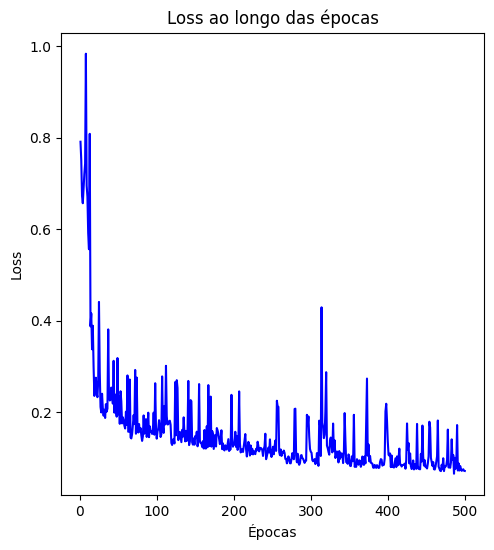

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=500, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Proporção')
plt.title('Treinamento CP Lula industrial')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Predição para o ano 1950: 0.015751907601952553
Predição para o ano 1951: 0.015946902334690094
Predição para o ano 1952: 0.01614152267575264
Predição para o ano 1953: 0.01633520796895027
Predição para o ano 1954: 0.016528945416212082
Predição para o ano 1955: 0.01672295480966568
Predição para o ano 1956: 0.01691964641213417
Predição para o ano 1957: 0.017116311937570572
Predição para o ano 1958: 0.017312968149781227
Predição para o ano 1959: 0.017509661614894867
Predição para o ano 1960: 0.0177063699811697
Predição para o ano 1961: 0.017903035506606102
Predição para o ano 1962: 0.01809971034526825
Predição para o ano 1963: 0.018296392634510994
Predição para o ano 1964: 0.01849309355020523
Predição para o ano 1965: 0.018689749762415886
Predição para o ano 1966: 0.018886415287852287
Predição para o ano 1967: 0.01908308081328869
Predição para o ano 1968: 0.01927977241575718
Predição para o ano 1969: 0.01947643794119358
Predição para o ano 1970: 0.0196

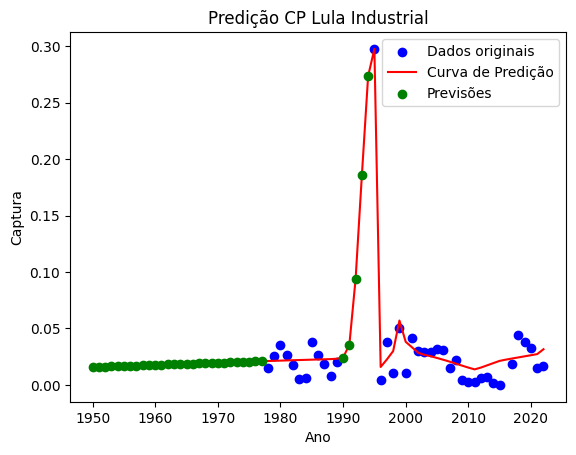

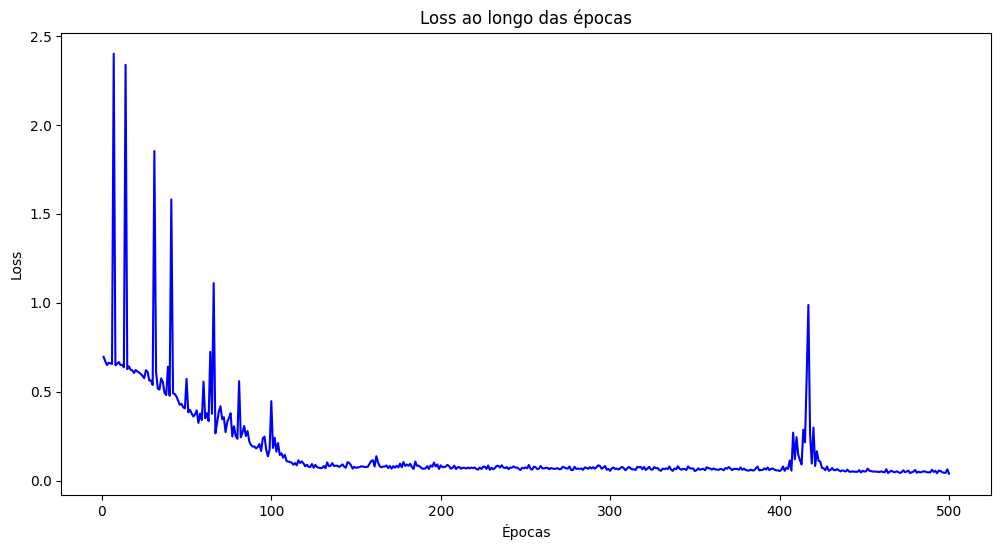

In [68]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1990, 1991, 1992, 1993, 1994]).reshape(-1, 1)

anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std

predicoes_normalizadas = model.predict(anos_para_prever_normalizados)

predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição CP Lula Industrial')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [54]:
df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Lula_industrial_reconstruido2.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN          0.395146
1   1951.0               NaN          0.386535
2   1952.0               NaN          0.377951
3   1953.0               NaN          0.369388
4   1954.0               NaN          0.360824
..     ...               ...               ...
67  2018.0          0.019318               NaN
68  2019.0          0.016354               NaN
69  2020.0          0.005718               NaN
70  2021.0          0.010081               NaN
71  2022.0          0.005186               NaN

[72 rows x 3 columns]


Polvo artesanal

In [62]:
df = pd.read_excel('curvas_de_propocao/Polvo_art_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.015267
1,1979,0.025478
2,1980,0.035326
3,1981,0.026565
4,1982,0.017544


In [63]:
df_x1= pd.DataFrame(df, columns= ['Ano', 'Proporção'])
df_x1= df_x1.drop_duplicates(subset= 'Proporção')


In [64]:
x = np.array(df_x1['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x1['Proporção'], dtype=np.float32).reshape(-1, 1)

In [65]:
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.6498024463653564
Epoch 200: loss = 0.07701834291219711
Epoch 300: loss = 0.07688671350479126
Epoch 400: loss = 0.07770351320505142
Epoch 500: loss = 0.06955558806657791
Epoch 600: loss = 0.07121358066797256
Epoch 700: loss = 0.06666211038827896
Epoch 800: loss = 0.06884575635194778
Epoch 900: loss = 0.6846510171890259
Epoch 1000: loss = 0.45208972692489624
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


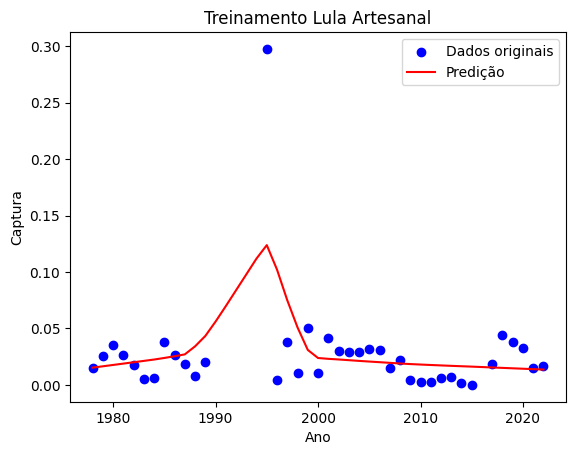

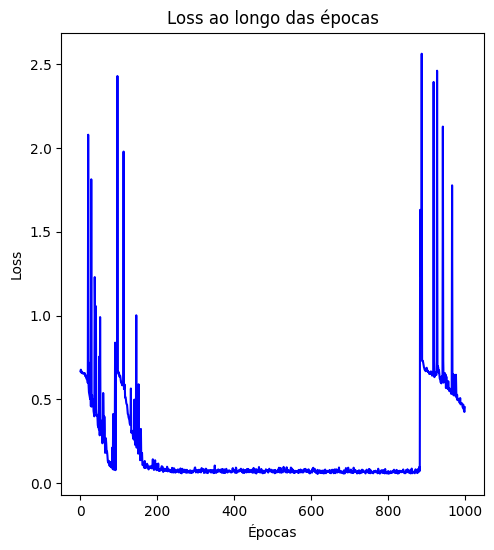

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Lula Artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predição para o ano 1950: 0.015751907601952553
Predição para o ano 1951: 0.015946902334690094
Predição para o ano 1952: 0.01614152267575264
Predição para o ano 1953: 0.01633520796895027
Predição para o ano 1954: 0.016528945416212082
Predição para o ano 1955: 0.01672295480966568
Predição para o ano 1956: 0.01691964641213417
Predição para o ano 1957: 0.017116311937570572
Predição para o ano 1958: 0.017312968149781227
Predição para o ano 1959: 0.017509661614894867
Predição para o ano 1960: 0.0177063699811697
Predição para o ano 1961: 0.017903035506606102
Predição para o ano 1962: 0.01809971034526825
Predição para o ano 1963: 0.018296392634510994
Predição para o ano 1964: 0.01849309355020523
Predição para o ano 1965: 0.018689749762415886
Predição para o ano 1966: 0.018886415287852287
Predição para o ano 1967: 0.01908308081328869
Predição para o ano 1968: 0.01927977241575718
Predição para o ano 1969: 0.01947643794119358
Predição para o ano 1970: 0.01967

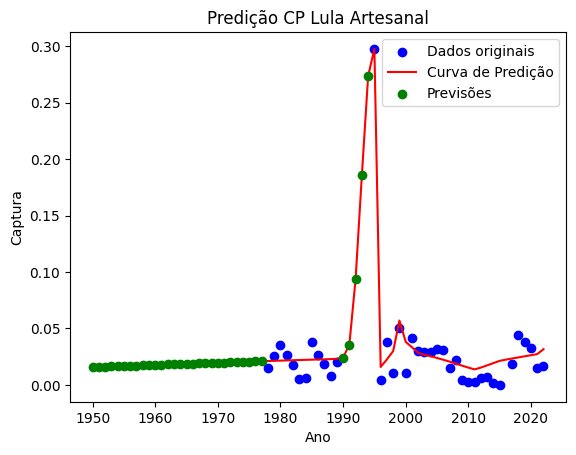

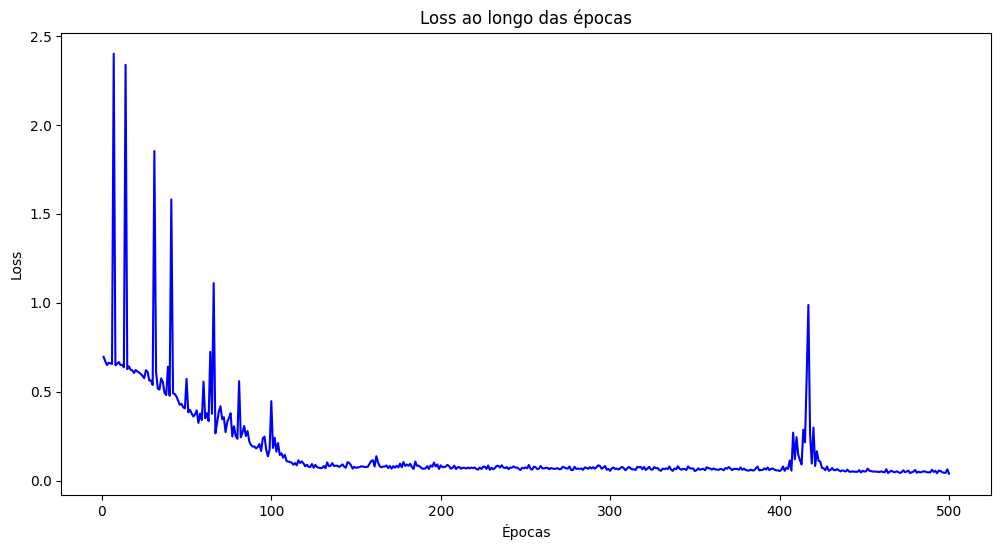

In [67]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1990, 1991, 1992, 1993, 1994]).reshape(-1, 1)

anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std

predicoes_normalizadas = model.predict(anos_para_prever_normalizados)

predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição CP Polvo Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [70]:
df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Polvo_artesanal_reconstruido2.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN          0.015752
1   1951.0               NaN          0.015947
2   1952.0               NaN          0.016142
3   1953.0               NaN          0.016335
4   1954.0               NaN          0.016529
..     ...               ...               ...
67  2018.0          0.043843               NaN
68  2019.0          0.037619               NaN
69  2020.0          0.032770               NaN
70  2021.0          0.014735               NaN
71  2022.0          0.016526               NaN

[72 rows x 3 columns]


Polvo industrial

In [72]:
df = pd.read_excel('curvas_de_propocao/Polvo_ind_prop.xlsx')
df.head()

,Ano,Proporção
0,1978,0.022901
1,1979,0.006369
2,1980,0.005435
3,1981,0.037951
4,1982,0.070175


In [73]:
df_x1= pd.DataFrame(df, columns= ['Ano', 'Proporção'])
df_x1= df_x1.drop_duplicates(subset= 'Proporção')

In [74]:
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

C:\Users\Renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1264.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 100: loss = 0.2580417990684509
Epoch 200: loss = 0.06591513007879257
Epoch 300: loss = 0.07559256255626678
Epoch 400: loss = 0.06115386635065079
Epoch 500: loss = 0.2713678479194641
Epoch 600: loss = 0.07931190729141235
Epoch 700: loss = 0.05660700798034668
Epoch 800: loss = 0.06718382239341736
Epoch 900: loss = 0.061334799975156784
Epoch 1000: loss = 0.06535979360342026
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


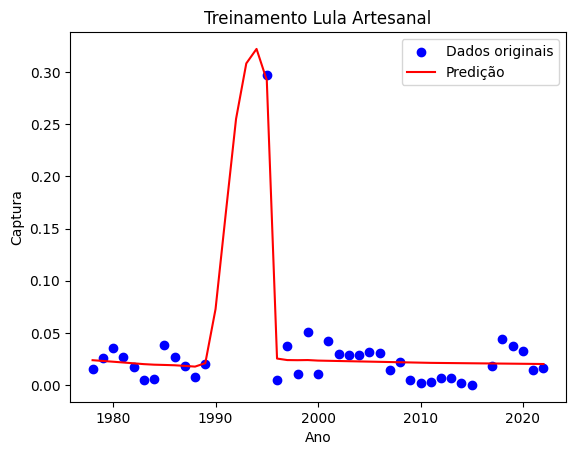

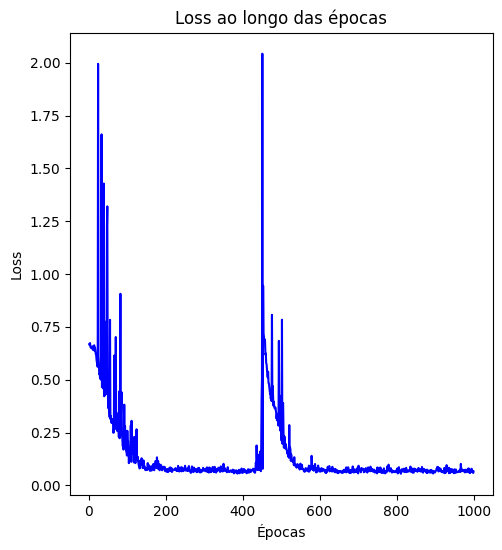

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

print_every_100_epochs = PrintEveryNEpochs(N=100) 

history = model.fit(
    x_normalized, y_normalized, 
    epochs=1000, 
    batch_size=12, 
    steps_per_epoch=50, 
    verbose=0,  
    callbacks=[print_every_100_epochs]
)
x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Proporção Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Proporção Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Proporção Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Proporção Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Treinamento Lula Artesanal')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predição para o ano 1950: 0.10800552368164062
Predição para o ano 1951: 0.10454534739255905
Predição para o ano 1952: 0.10108520835638046
Predição para o ano 1953: 0.09762490540742874
Predição para o ano 1954: 0.09416476637125015
Predição para o ano 1955: 0.09070437401533127
Predição para o ano 1956: 0.08724415302276611
Predição para o ano 1957: 0.08378388732671738
Predição para o ano 1958: 0.08032374829053879
Predição para o ano 1959: 0.07686340063810349
Predição para o ano 1960: 0.0734032616019249
Predição para o ano 1961: 0.0699426531791687
Predição para o ano 1962: 0.066482774913311
Predição para o ano 1963: 0.06302255392074585
Predição para o ano 1964: 0.05956220626831055
Predição para o ano 1965: 0.05610215663909912
Predição para o ano 1966: 0.05249535292387009
Predição para o ano 1967: 0.04886355251073837
Predição para o ano 1968: 0.04523192718625069
Predição para o ano 1969: 0.04160019010305405
Predição para o ano 1970: 0.03797409310936928


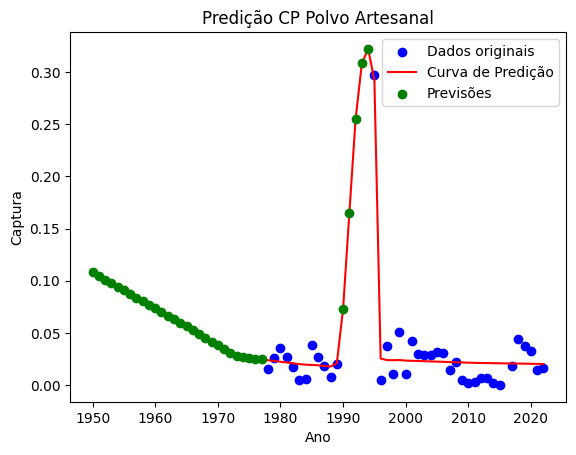

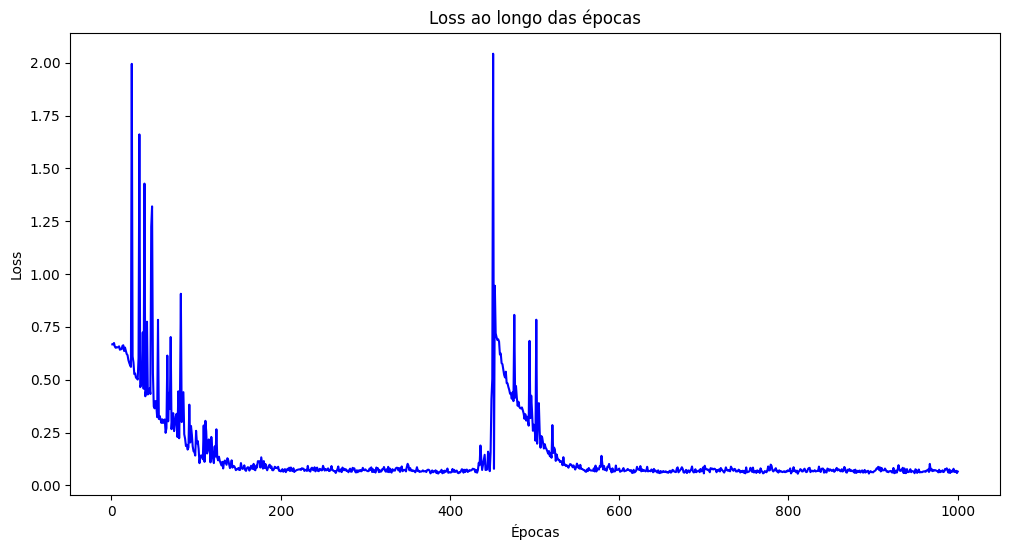

In [76]:
anos_para_prever = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1990, 1991, 1992, 1993, 1994]).reshape(-1, 1)

anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std

predicoes_normalizadas = model.predict(anos_para_prever_normalizados)

predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')
df_anos_para_prever = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.concat([df_combined, df_anos_para_prever]).drop_duplicates().sort_values(by='Ano')


plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Curva de Predição')
plt.scatter(df_anos_para_prever['Ano'], df_anos_para_prever['Captura Preditos'], color='green', label='Previsões', zorder=5)
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição CP Polvo Artesanal')
plt.legend()
plt.show()


loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()

In [77]:
df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
df_combined['Captura Original'] = df_combined['Captura Original'].clip(lower=0)
df_combined['Captura Preditos'] = df_combined['Captura Preditos'].clip(lower=0)
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Polvo_industrial_reconstruido2.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
0   1950.0               NaN          0.108006
1   1951.0               NaN          0.104545
2   1952.0               NaN          0.101085
3   1953.0               NaN          0.097625
4   1954.0               NaN          0.094165
..     ...               ...               ...
67  2018.0          0.043843               NaN
68  2019.0          0.037619               NaN
69  2020.0          0.032770               NaN
70  2021.0          0.014735               NaN
71  2022.0          0.016526               NaN

[72 rows x 3 columns]
